<a href="https://colab.research.google.com/github/dongminkim0220/cats_and_dogs_variations/blob/master/basecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cat and Dog - Play with models

By Dongmin Kim

In [ ]:
import numpy as np
import tensorflow as tf
from keras import models
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
import matplotlib.pyplot as plt

studentID = 2014311577
np.random.seed(studentID)

Using TensorFlow backend.


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


- Data Pre-processing
1. Training set: 1,000 cat images, 1,000 dog images
2. Validation set: 500 cat images, 500 dog images
3. Use ImageDataGenerator() and .flow_from_dataframe()
(https://keras.io/preprocessing/image/) to feed input images.
Apply data augmentation to the training set to improve the performance.
* Augmentation options: rescale=1./255, rotation_range=20,
width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
zoom_range=0.1, horizontal_flip=True, fill_mode='nearest'

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale=1./255, 
  rotation_range=20, 
  width_shift_range=0.1, 
  height_shift_range=0.1, 
  shear_range=0.1, 
  zoom_range=0.1, 
  horizontal_flip=True, 
  fill_mode='nearest'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale=1./255, 
  rotation_range=20, 
  width_shift_range=0.1, 
  height_shift_range=0.1, 
  shear_range=0.1, 
  zoom_range=0.1, 
  horizontal_flip=True, 
  fill_mode='nearest'
)

In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/PR_hw6/cats_and_dogs_filtered"

train_generator = train_datagen.flow_from_directory(
        path+'/train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        path+'/validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# import available models for training
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50, ResNet101, ResNet152
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
from keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from keras.applications.nasnet import NASNetLarge, NASNetMobile

In [ ]:
def get_model_key_value():
  input_tensor = Input(shape = (150, 150, 3))
  model_dict = dict()
  
  model_dict["Xception"] = Xception(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,
  )

  model_dict["VGG16"] = VGG16(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,
  )

  model_dict["VGG19"] = VGG19(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,
  )

  model_dict["ResNet50"] = ResNet50(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  model_dict["ResNet101"] = ResNet101(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  model_dict["ResNet152"] = ResNet152(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  model_dict["InceptionV3"] = InceptionV3(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  model_dict["InceptionResNetV2"] = InceptionResNetV2(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  model_dict["MobileNet"] = MobileNet(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  model_dict["DenseNet121"] = DenseNet121(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )
  
  model_dict["DenseNet169"] = DenseNet169(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  model_dict["DenseNet201"] = DenseNet201(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  model_dict["NASNetMobile"] = NASNetMobile(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  model_dict["NASNetLarge"] = NASNetLarge(
    weights = 'imagenet',
    include_top = False, #remove top dense layers.
    input_tensor = input_tensor,      
  )

  # returns array with names, and models
  return [*model_dict.keys()], model_dict.values()

In [ ]:
def setupmodel(model):
  base_model = model
  # Setup
  x = base_model.output
  x = Flatten()(x)
  x = Dense(256, activation = "relu")(x)
  prediction = Dense(1, activation="sigmoid")(x)

  # model return
  model = Model(base_model.input, prediction)

  # trainable
  for l in base_model.layers:
    l.trainable = False

  return model

In [ ]:
model_names, models = get_model_key_value()
model_lists = [setupmodel(m) for m in models]

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


- Model Compiling
1. Use binary cross entropy as the loss function
2. Start with a learning rate of 2e-5



- Model Training
1. Train your model using fit_generator(). Select proper parameters for
steps_per_epoch and validation_steps. steps_per_epoch is the total
number of steps (batches or samples) before declaring one epoch finished and starting
the next epoch; validation_steps is the total number of steps (batches or samples)
to draw before stopping when performing validation at the end of every epoch
(validation_data required).
2. Use a batch size of 10 epochs.

In [ ]:
def train_model(model, optimizer):
  model.compile(
    optimizer = optimizer,
    loss = 'binary_crossentropy',
    metrics=['accuracy']
  )
  model_train = model.fit_generator(
    train_generator,
    steps_per_epoch = 100, # 2000 / 20 
    epochs = 50,##
    validation_data = validation_generator,
    validation_steps =50, # 1000 / 20
  )
  return model_train

def train_model_list(modelnames, modellist):
  with tf.device('/device:GPU:0'):    
    results = []
    for idx, m in enumerate(modellist):
      print("===", modelnames[idx], "===")
      print(m.summary())
      results.append(train_model(m, tf.keras.optimizers.SGD(lr = 2e-5)))
  
  return results

In [ ]:
results = train_model_list(model_names, model_lists)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
conv4_block37_1_conv (Conv2D)   (None, 9, 9, 128)    180224      conv4_block37_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block37_1_bn (BatchNormal (None, 9, 9, 128)    512         conv4_block37_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block37_1_relu (Activatio (None, 9, 9, 128)    0           conv4_block37_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block37_2_conv (Conv2D)   (None, 9, 9, 32)     36864       conv4_block37_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block37_concat (Concatena (None, 9, 9, 1440)   0           conv4_block36_concat[0][0]       
                                                                 conv4_bl

**Plot Results**

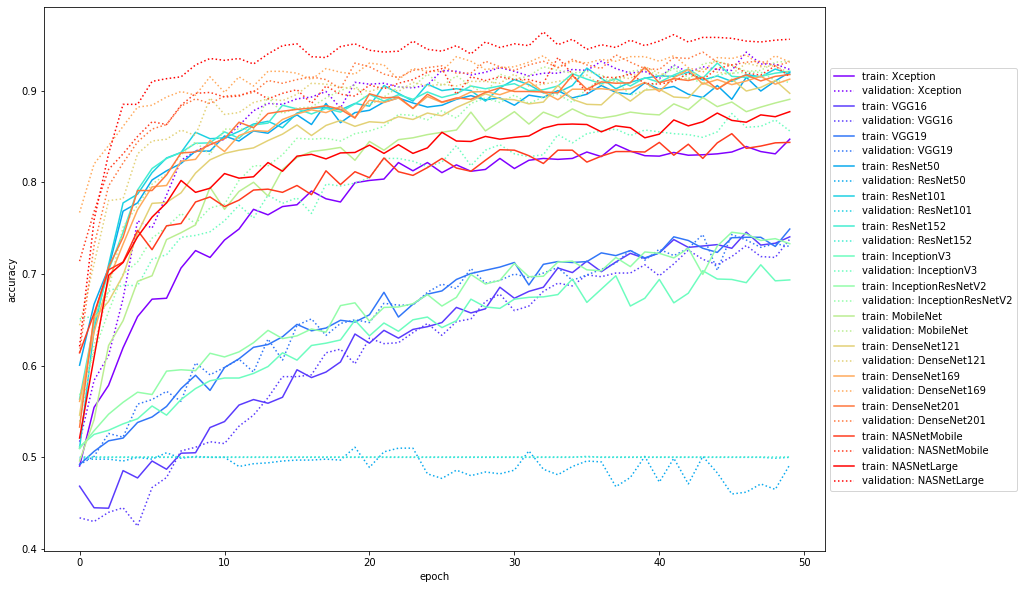

In [ ]:
from matplotlib import cm
plt.rcParams["figure.figsize"] = (14,10)

#colors = ["red", "blue", "green", "yellow", "black"]
#c_lst = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, len(set(df['y'])))]

evenly_spaced_interval = np.linspace(0, 1, len(results))
colors = [cm.rainbow(x) for x in evenly_spaced_interval]

for idx, result in enumerate(results):
  plt.plot(result.history['accuracy'], label = "train: " + model_names[idx], color = colors[idx])
  plt.plot(result.history['val_accuracy'], label = "validation: " + model_names[idx], color = colors[idx], linestyle = "dotted")

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Save Model and Relevant Data**

In [ ]:
import pickle
import pandas as pd

# save result
with open("results.pickle", "wb") as fw:
  pickle.dump(results, fw)

# save history object in pandas
history_file = []
for idx, result in enumerate(results):
  hist_df = pd.concat({model_names[idx] : pd.DataFrame(results[idx].history)}, axis = 1)
  history_file.append(hist_df)
history_file = pd.concat(history_file, axis = 1)

# save results as csv
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    history_file.to_csv(f)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '
